# Automatic creation of system documentation with Neo4j

## Introduction
As is very common, there are legacy systems/applications without any documentation and their maintenance or further development isn't an easy task. This article describes how is possible to create documentation automatically with minimum effort in form of ArchiMate model in **Sparx Enterprise Architect** and **Archi**. 

In our case, we will automatically create the application documentation that will describe basic entities as are **screens, fragments, roles, files** and **relations** between them.

An illustrative example of our application is below:

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example.jpg?raw=true")

There is only the source code of the application, but fortunately, there is a way (by source code scrapping) how to all required information can be obtained automatically. The code scrapping is not the subject of this article and has to be implemented according to application.

The example of an outcome from the scrapping for one **screen** (Screen_414) in **json** format is below:

```json
	{
		"title": "Title of Screen_414",
		"code": "Screen_414",
		"roleList": [
			"Role_1262"
		],
		"fragmentList": [
			{
				"subFragmentList": [
					{
						"subFragmentList": [
							{
								"subFragmentList": [],
								"fileName": "Fragment_1330.jsp",
								"path": "/tiles/com/fragments/Fragment_1330.jsp"
							}
						],
						"fileName": "Fragment_1329.jsp",
						"path": "/tiles/com/fragments/Fragment_1329.jsp"
					},
					{
						"subFragmentList": [],
						"fileName": "Fragment_1331.jsp",
						"path": "/tiles/com/fragments/Fragment_1331.jsp"
					}
				],
				"fileName": "Fragment_1328.jsp",
				"path": "/tiles/com/fragments/Fragment_1328.jsp"
			}
		],
		"screenList": [],
		"link": "ADM033",
		"group": "ADM",
		"fileName": "Screen_414.jsp",
		"path": "/WEB-INF/tiles/adm/Screen_414.jsp"
	},
```

The example of **automatically** created documentation for one **screen** (Screen_414) in Sparx Enterprise Architect:

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_model_example.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_model_example.jpg?raw=true")

##  Solution architecture

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_architecture.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_architecture.jpg?raw=true")

**Description of architecture components**

| Component | Description |
| :- | :------------- |
| Legacy application | An anonymous system/application for which the documentation will be created. |
| Outcome from the scrapping | The file as an outcome from the scrapping (in json format) containing information about screens, fragments, roles, files and relations between them. <p> <p> The anonymized file is available here:  [screenList_20210105_anonymized.json](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/screenList_20210105_anonymized.json "File screenList_20210105_anonymized.json") |
| Python / Neo4j | The Python script in Jupyter Notebook using a graph database [Neo4j](https://neo4j.com/ "Neo4j graph database"). <p> There is a possibility to use [Sandbox](https://neo4j.com/sandbox/) and create new Neo4j database in less than 60 seconds. No download required. |
| Import definition to Neo4j | Part of the Python script. The script imports data from file [screenList_20210105_anonymized.json](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/screenList_20210105_anonymized.json "File screenList_20210105_anonymized.json") to graph database Neo4j. |
| Generate ArchiMate model definition | Part of the Python script. The script creates valid file in format [ArchiMate® 3.1 Model Exchange File definition](https://www.opengroup.org/xsd/archimate/): <p><p>- [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") <p><p> The ArchiMate Model Exchange File Format is a standard file format that can be used to exchange ArchiMate models between tools that create or interpret ArchiMate models.The scope of the standard is restricted to the elements and the relationships of an ArchiMate model. It excludes features that are vendorspecific. |
| Generate model views definition | Part of the Python script.The script creates files with the definition of views: <p><p>- [screens.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screens.csv)<p>- [roles.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/roles.csv) <p>- [fragments.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/fragments.csv) <p>- [links.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/links.csv) <p><p> Header of definition file:<p> **DiagramName;NodeKeys;Documentation** |
| Sparx Enterprise Architect | [Sparx Enterprise Architect](https://sparxsystems.com/ "Sparx Enterprise Architect") is a visual platform for designing and constructing software systems, for business process modeling, and for more generalized modeling purposes. |
| Import ArchiMate model definition | A native functionality of [Sparx Enterprise Architect](https://sparxsystems.com/ "Sparx Enterprise Architect").  We have a valid ArchiMate® 3.1 Model Exchange File. <p>It is possible to [import](https://sparxsystems.com/enterprise_architect_user_guide/15.2/model_domains/imparchmeff.html "Import ArchiMate® 3.1 Model Exchange File") generated file [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") into a [prepared](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/model_template.eapx "Prepared EA file with VB script") Enterprise Architect project as a UML model. <p>To import an Open Exchange Format file, in Ribbon select the item **"Specialize > Technologies > ArchiMate > Import Model Exchange File"**. Click on Import button to import the selected Model Exchange file into the specified Package. |
| Generate ArchiMate views | An implemented VB script [#1 generate_archimate_diagrams.vbs](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/%231%20generate_archimate_diagrams.vbs "VBA script") in the [prepared](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/model_template.eapx "Prepared EA file with VB script") Enterprise Architect project. The VB script generates diagrams  by definition in files: <p><p>- [screens.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screens.csv)<p>- [roles.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/roles.csv) <p>- [fragments.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/fragments.csv) <p>- [links.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/links.csv) <p> To run the VB script, select context menu item "[Specialize->Scripts->#1 generate_archimate_diagrams](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_run_script.jpg "Run VB script")"
 |
| Archi | [Archi](https://www.archimatetool.com/ "Archi") is an open source modelling toolkit to create ArchiMate models and sketches. |
| Import ArchiMate model definition | A native functionality of [Archi](https://www.archimatetool.com/ "Archi"). <p>It is possible to [import](https://... "Import ArchiMate® 3.1 Model Exchange File") generated file [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") and create a new ArchiMate model. <p>To import an Open Exchange Format file, select the menu item **"File->Import->Open Exchange XML Model..."**. Select and open the required XML file. This will create a new ArchiMate model in the Models Tree. |

## Graph database schema

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema.jpg?raw=true")  

**Node labels**

| Node Labels | Description | Properties |
| :- | :------------- | :- |
| Screen | Screen of application. | <p> "path": "/WEB-INF/tiles/adm/Screen_414.jsp" <p>"fileName": "Screen_414.jsp" <p>"code": "Screen_414" <p>"documentation": "Screen ... <p>"name": "Screen_414" <p>"link": "ADM033" <p>"alias": "Title of Screen_414" <p> "id": "NEOID_cfabe9f8-ff6c-4ee6-ab19-ae0bdc7f192e" <p>"class": "ApplicationComponent" <p>"group": "ADM" |
| Fragment | Fragment bolongs to screen or other fragment. | <p>"path": "/tiles/com/fragments/Fragment_1297.jsp" <p>"fileName": "Fragment_1297.jsp" <p> "documentation": "Fragment ... " <p> "name": "Fragment_1297" <p> "id": "NEOID_0fdcc7a5-1889-4fb6-aa62-94bf5128f840" <p>"class": "ApplicationComponent" |
| File | File where screen or fragment is defined. | <p>"name": "Fragment_1315.jsp" <p>"path": "/tiles/com/fragments/Fragment_1315.jsp" <p>"id": "NEOID_04ff5f05-a207-4b8d-a1e8-928f187822e1" <p>"class": "DataObject" <p>"documentation": "File ..." |
| Role | Role that restricts access to screen.  | <p>"name": "Role_1259" <p>"id": "NEOID_44086a73-aa07-423e-a119-449e12e7ff9b" <p>"class": "DataObject" <p>"documentation": "Role ... " |

**Relationship Types**

| Relationship Types | Description |
| :- | :------------- |
| FlowRelationships | Relation represents the possible transition from one screen to another (name: 'LINK_TO'). |
| CompositionRelationships | Relation represents that fragment is part of the screen or another fragment (name: 'HAS_FRAGMENT'). |
| AssociationRelationships | Relation represents that screen or fragment is defined in the file (name: 'HAS_FILE'). Relation represents a role which controls access to the screen (name: 'HAS_ROLE'). |

## Description how to generate documentation
1. Create new Neo4j database (https://neo4j.com/sandbox/)
2. Set this Python script parameters
3. Run this script and generete files:
    - screen_model.xml
    - screens.csv
    - roles.csv
    - fragments.csv
    - links.csv
4. Import **screen_model.xml** file to **Sparx Enterprise Architect** (Specialize  --> ArchiMate  --> Import Model Exchange File).
5. Run a script in **Sparx Enterprise Architect** (#1 generate_archimate_diagrams) ... diagrams are generated by definition in files:
    - screens.csv
    - roles.csv
    - fragments.csv
    - links.csv

## Implementation

### Set parameters

In [1]:
# Neo4j connection properties

#********************************************************************
# Other Neo4j system properties
#********************************************************************

#dbms.directories.import=/Work/????/\n",
#apoc.export.file.enabled=true\n",
#apoc.import.file.use_neo4j_config=false\n",
#apoc.import.file.enabled=true\n",
#********************************************************************

boltUrl = "bolt://localhost:7687"
userName = "neo4j"
password = "GraphAlg"

#// https://neo4j.com/sandbox/
#boltUrl = "bolt://100.25.130.199:32868"
#userName = "neo4j"
#password = "film-bracing-helmsmen"

definitionUrl = "https://raw.githubusercontent.com/pospisilboh/ScreenDocumentation/main/ImportFromFile/screenList_20210105_anonymized.json?raw=true"
exportPath = "c:/Work/ApplicationX/Model/ExportFromNeo4j/"
modelName = "screen_model.xml"

In [2]:
# pip install neo4j-driver

from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
    boltUrl, 
    auth=basic_auth(userName, password))
session = driver.session()

In [3]:
from pandas import DataFrame
import numpy as np

### Create database

In [4]:
cypher_query_clear_database = '''

// Clear database

call apoc.periodic.iterate("MATCH (n) return n", "DETACH DELETE n", {batchSize:1000})
yield batches, total return batches, total

'''

cypher_query_import = '''

// Import

CALL apoc.load.json($definitionUrl) YIELD value
WITH value.title AS title, 
     value.code AS code, 
     value.link AS link, 
     value.group AS group, 
     value.fileName AS fileName, 
     value.path AS path, 
     value.roleList AS roleList, 
     value.screenList AS screenList, 
     value.fragmentList AS fragmentList

MERGE (s:Screen:ApplicationComponent {class:'ApplicationComponent', link: ToUPPER(link), fileName: fileName})
ON CREATE SET s.id = 'NEOID_' + apoc.create.uuid(),
              s.name = code,
              s.alias = title,
              s.code = code,
              s.group = group,
              s.path = path,
              s.documentation = 'Screen <b>' + title + '</b>.'
ON MATCH SET  s.name = code,
              s.alias = title,
              s.code = code,
              s.group = group,
              s.path = path,
              s.documentation = 'Screen <b>' + title + '</b>.'

FOREACH (role IN roleList | 
	MERGE (r:Role:DataObject {class:'DataObject', name: role}) 
    ON CREATE SET r.id = 'NEOID_' + apoc.create.uuid(),
    			  r.documentation = 'Role <b>' + role + '</b>.'
    
    MERGE (s)-[r1:AssociationRelationships {class: 'Association', name: 'HAS_ROLE'}]-(r)
    ON CREATE SET r1.id = 'NEOID_' + apoc.create.uuid()
)

FOREACH (fragment IN fragmentList | 
	MERGE (fr:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(fragment.fileName, '.')), fileName: fragment.fileName, path: fragment.path}) 
    ON CREATE SET fr.id = 'NEOID_' + apoc.create.uuid(),
    			  fr.documentation = 'Fragment <b>' + HEAD(SPLIT(fragment.fileName, '.')) + '</b>.'
    
    MERGE (s)-[r2:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr)
    ON CREATE SET r2.id = 'NEOID_' + apoc.create.uuid()
    
    FOREACH (subFragment1 IN fragment.subFragmentList | 
    	MERGE (fr1:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment1.fileName, '.')), fileName: subFragment1.fileName, path: subFragment1.path}) 
        ON CREATE SET fr1.id = 'NEOID_' + apoc.create.uuid(),
        			  fr1.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment1.fileName, '.')) + '</b>.'
        
    	MERGE (fr)-[r3:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr1)
        ON CREATE SET r3.id = 'NEOID_' + apoc.create.uuid()
        
        FOREACH (subFragment2 IN subFragment1.subFragmentList | 
    		MERGE (fr2:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment2.fileName, '.')), fileName: subFragment2.fileName, path: subFragment2.path}) 
            ON CREATE SET fr2.id = 'NEOID_' + apoc.create.uuid(),
            			  fr2.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment2.fileName, '.')) + '</b>.'
            
    		MERGE (fr1)-[r4:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr2)
            ON CREATE SET r4.id = 'NEOID_' + apoc.create.uuid()
            
            FOREACH (subFragment3 IN subFragment2.subFragmentList | 
    			MERGE (fr3:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment3.fileName, '.')), fileName: subFragment3.fileName, path: subFragment3.path}) 
                ON CREATE SET fr3.id = 'NEOID_' + apoc.create.uuid(),
            			      fr3.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment3.fileName, '.')) + '</b>.'
                
    			MERGE (fr2)-[r5:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr3)
                ON CREATE SET r5.id = 'NEOID_' + apoc.create.uuid()
        	)
        )
    )
)

FOREACH (screenLink IN screenList | 
	MERGE (sl:Screen:ApplicationComponent {class:'ApplicationComponent', link: ToUPPER(screenLink.link), fileName: screenLink.fileName})
    ON CREATE SET sl.id = 'NEOID_' + apoc.create.uuid()
    
    MERGE (s)-[r6:FlowRelationships {class: 'Flow', name: 'LINK_TO'}]-(sl)
    ON CREATE SET r6.id = 'NEOID_' + apoc.create.uuid()
)

'''

In [5]:
cypher_query_create_file = '''

// Create files and relations to files
MATCH (n)
WHERE EXISTS(n.fileName)
WITH n

MERGE (file:File:DataObject {class:'DataObject', name: n.fileName, path: n.path})
ON CREATE SET file.id = 'NEOID_' + apoc.create.uuid(),
              file.documentation = 'File <b>' + n.fileName + '</b>.'

MERGE (n)-[r:AssociationRelationships {class: 'Association', name: 'SAVED_IN'}]-(file)
ON CREATE SET r.id = 'NEOID_' + apoc.create.uuid()

'''

In [6]:
cypher_query_documentation_screen_add = '''

MATCH (n:Screen)
WITH n
SET n.documentation = n.documentation + ' <p> <b>Code:</b> <p>- ' + n.code
SET n.documentation = n.documentation + ' <p> <b>File:</b> <p>- ' + n.fileName

'''

cypher_query_documentation_fragment_add = '''

MATCH (n:Fragment)
WITH n
SET n.documentation = n.documentation + ' <p> <b>File:</b> <p>- ' + n.fileName

'''

cypher_query_documentation_add_roles = '''

MATCH (n)-[:AssociationRelationships]->(r:Role)
WITH n, n.id AS ID, r.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Roles:</b> <p>' + Value

'''

cypher_query_documentation_add_fragments = '''

MATCH (n)-[:CompositionRelationships*]->(f:Fragment)
WITH n, n.id AS ID, f.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Fragments:</b> <p>' + Value

'''

cypher_query_documentation_add_screens = '''

MATCH (n:Screen)-[:FlowRelationships]->(s:Screen)
WITH n, n.id AS ID, s.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_documentation_role_add_screens = '''

MATCH (r:Role)<-[:AssociationRelationships]->(s:Screen)
WITH r, r.id AS ID, s.name As Value
ORDER BY ID, Value
WITH r, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET r.documentation = r.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_documentation_fragment_add_screens = '''

MATCH (f:Fragment)<-[:CompositionRelationships*]-(s:Screen)
WITH f, f.id AS ID, s.name As Value
ORDER BY ID, Value
WITH f, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET f.documentation = f.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_create_elements = '''

//Create elements.csv

MATCH (n)
WHERE EXISTS(n.id)
RETURN n.id AS ID, n.class AS Type, n.name AS Name, COALESCE(n.documentation, '')  AS Documentation

'''

cypher_query_create_relations = '''

//Create relations.csv

MATCH (n)-[r]->(m)
WHERE EXISTS(n.id) AND EXISTS(m.id)
RETURN r.id AS ID, r.class  + 'Relationship' AS Type, COALESCE(r.name, '')  AS Name, COALESCE(r.documentation, '') AS Documentation, n.id AS Source, m.id AS Target

'''

cypher_query_create_properties = '''

//Create properties.csv

MATCH (n)
WHERE EXISTS(n.id)
RETURN n.id AS ID, 'GUID' AS Key, n.id AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.code)
RETURN n.id AS ID, 'Code' AS Key, n.code AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.path)
RETURN n.id AS ID, 'Path' AS Key, n.path AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.fileName)
RETURN n.id AS ID, 'FileName' AS Key, n.fileName AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.alias)
RETURN n.id AS ID, 'Alias' AS Key, n.alias AS Value

UNION
MATCH (n)-[:AssociationRelationships]->(r:Role)
WHERE EXISTS(n.id)
WITH n.id AS ID, r.name As Value
ORDER BY ID, Value
RETURN ID, 'Roles' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

UNION
MATCH (n)-[:CompositionRelationships*]->(f:Fragment)
WHERE EXISTS(n.id)
WITH n.id AS ID, f.name As Value
ORDER BY ID, Value
RETURN ID, 'Fragments' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

UNION
MATCH (n:Screen)-[:FlowRelationships]->(s:Screen)
WHERE EXISTS(n.id)
WITH n.id AS ID, s.name As Value
ORDER BY ID, Value
RETURN ID, 'Screens' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

'''

cypher_query_create_screens = '''

//Create definition for screen diagrams ... screens.csv

MATCH (s:Screen)-[:AssociationRelationships]->(f:File)
OPTIONAL MATCH (s)-[:AssociationRelationships]->(r:Role)
OPTIONAL MATCH (s)-[:CompositionRelationships*1..3]->(fr:Fragment)
OPTIONAL MATCH (s)-[:FlowRelationships]->(so:Screen)
WITH s.group + '.' + s.code + '.' + s.alias AS DiagramName,
collect(DISTINCT s.id) + collect(DISTINCT f.id) + collect(DISTINCT r.id) + collect(DISTINCT fr.id) + collect(DISTINCT so.id) as NodeKeys,
'The diagram describes the screen ' + s.alias + '.' AS Documentation
WHERE DiagramName IS NOT NULL
RETURN DiagramName, NodeKeys, Documentation
    
'''

cypher_query_create_roles = '''

//Create definition for role diagrams ... roles.csv

MATCH (s:Screen)-[:AssociationRelationships]->(r:Role)
WITH r.name AS DiagramName, 
collect(DISTINCT s.id) + collect(DISTINCT r.id) as NodeKeys,
'The diagram describes the role ' + r.name + '.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

cypher_query_create_fragments = '''

//Create definition for fragment diagrams ... fragments.csv

MATCH (s)-[:CompositionRelationships*1..3]->(fr:Fragment)
OPTIONAL MATCH (fr)-[:CompositionRelationships*1..3]->(frs:Fragment)
OPTIONAL MATCH (fr)<-[:CompositionRelationships*1..3]-(fru:Fragment)
OPTIONAL MATCH (fr)-[:AssociationRelationships]->(f:File)
WITH fr.name AS DiagramName, 
collect(DISTINCT s.id) + collect(DISTINCT f.id) + collect(DISTINCT fr.id) + collect(DISTINCT frs.id) + collect(DISTINCT fru.id) as NodeKeys,
'The diagram describes the fragment ' + fr.name + '.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

cypher_query_create_links = '''

//Create definition for screen links diagram ... links.csv

MATCH (s1:Screen)-[:FlowRelationships]-(s2:Screen)
OPTIONAL MATCH (s1)-[:AssociationRelationships]->(r1:Role)
OPTIONAL MATCH (s2)-[:AssociationRelationships]->(r2:Role)
WITH 'Transitions between screens' AS DiagramName,
collect(DISTINCT s1.id) + collect(DISTINCT s2.id) + collect(DISTINCT r1.id) + collect(DISTINCT r2.id) as NodeKeys,
'The diagram describes the transitions between screens.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

In [7]:
# Import common
results = session.run(cypher_query_clear_database, parameters={})
results = session.run(cypher_query_import, definitionUrl=definitionUrl)

# Create Files and relations to Screens and Fragments 
results = session.run(cypher_query_create_file, parameters={})

# Add documentation parts
results = session.run(cypher_query_documentation_screen_add, parameters={})
results = session.run(cypher_query_documentation_fragment_add, parameters={})
results = session.run(cypher_query_documentation_add_roles, parameters={})
results = session.run(cypher_query_documentation_add_screens, parameters={})
results = session.run(cypher_query_documentation_add_fragments, parameters={})
results = session.run(cypher_query_documentation_role_add_screens, parameters={})
results = session.run(cypher_query_documentation_fragment_add_screens, parameters={})

### Create export

#### Create export for Sparx EA - definition of diagrams 

In [8]:
# Create screens ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_screens, parameters={})
dfScreens = DataFrame([r.values() for r in results], columns=results.keys())

dfScreens.to_csv(exportPath + 'screens.csv', index = False, sep = ';')
dfScreens.head(1)

,DiagramName,NodeKeys,Documentation
0,COM.Screen_2025.Title of Screen_2025,"[NEOID_7ca4871d-d760-48d5-a7a6-16bf22926681, N...",The diagram describes the screen Title of Scre...


In [9]:
# Create roles ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_roles, parameters={})
dfRoles = DataFrame([r.values() for r in results], columns=results.keys())

dfRoles.to_csv(exportPath + 'roles.csv', index = False, sep = ';')
dfRoles.head(1)

,DiagramName,NodeKeys,Documentation
0,Role_1259,"[NEOID_45e60595-ed18-4c94-b34b-b7157fad1e0d, N...",The diagram describes the role Role_1259.


In [10]:
# Create fragments ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_fragments, parameters={})
dfFragments = DataFrame([r.values() for r in results], columns=results.keys())

dfFragments.to_csv(exportPath + 'fragments.csv', index = False, sep = ';')
dfFragments.head(1)

,DiagramName,NodeKeys,Documentation
0,Fragment_1295,"[NEOID_bdebd45f-8690-4931-bdde-3c6739ae2af8, N...",The diagram describes the fragment Fragment_1295.


In [11]:
# Create links ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_links, parameters={})
dfLinks = DataFrame([r.values() for r in results], columns=results.keys())

dfLinks.to_csv(exportPath + 'links.csv', index = False, sep = ';')
dfLinks.head(1)

,DiagramName,NodeKeys,Documentation
0,Transitions between screens,"[NEOID_038da529-7ccb-4d6e-9f0b-8a98b6e7d20c, N...",The diagram describes the transitions between ...


#### Create export for Sparx EA - Model Exchange File

Generate XML document in ArchiMate® Model Exchange File Format for the ArchiMate 3.1 Modeling Language (https://www.opengroup.org/xsd/archimate/)

In [12]:
# Create elements
results = session.run(cypher_query_create_elements, parameters={})
dfElements = DataFrame([r.values() for r in results], columns=results.keys())

In [13]:
# Create relations
results = session.run(cypher_query_create_relations, parameters={})
dfRelations = DataFrame([r.values() for r in results], columns=results.keys())

In [14]:
# Create properties
results = session.run(cypher_query_create_properties, parameters={})
dfProperties = DataFrame([r.values() for r in results], columns=results.keys())

In [15]:
import xml.etree.ElementTree as gfg  
import uuid

def GenerateXML(fileName) : 
      
    attModel = {"xmlns":"http://www.opengroup.org/xsd/archimate/3.0/", "xmlns:xsi":"http://www.w3.org/2001/XMLSchema-instance", "xsi:schemaLocation":"http://www.opengroup.org/xsd/archimate/3.0/ http://www.opengroup.org/xsd/archimate/3.1/archimate3_Diagram.xsd", "identifier":"id-f4be663e-2bd7-4de9-9493-e822cab03c7c"}    
    model = gfg.Element("model", attModel) 
    
    attLang = {"xml:lang" : "cs"}  
    name = gfg.SubElement(model, "name", attLang)
    name.text = "Model of screens"

    elements = gfg.SubElement(model, "elements")
    relationships = gfg.SubElement(model, "relationships")
    
    organizations = gfg.SubElement(model, "organizations")
    
    item = gfg.SubElement(organizations, "item")
    label = gfg.SubElement(item, "label", attLang)
    label.text = "Application"
    
    for index, row in dfElements.iterrows(): 
        attElement = {"identifier":"id-" + row["ID"], "xsi:type": row["Type"]}
        element = gfg.SubElement(elements, "element", attElement)
        name = gfg.SubElement(element, "name", attLang)
        name.text = row["Name"]
        documentation = gfg.SubElement(element, "documentation", attLang)
        documentation.text = row["Documentation"]
    
        properties = gfg.SubElement(element, "properties")
        if len(dfProperties.loc[dfProperties['ID'] == row["ID"]].index) > 0 :
            for index, rowP in dfProperties.loc[dfProperties['ID'] == row["ID"]].iterrows():
                attProperty = {"propertyDefinitionRef": rowP["Key"]}
                property = gfg.SubElement(properties, "property", attProperty)
     
                value = gfg.SubElement(property, "value", attLang)
                value.text = rowP["Value"]
        
        attItem = {"identifierRef":"id-" + row["ID"]}
        gfg.SubElement(item, "item", attItem)       
    
    item = gfg.SubElement(organizations, "item")
    label = gfg.SubElement(item, "label", attLang)
    label.text = "Relations"
    
    for index, row in dfRelations.iterrows(): 
        attRelation = {"identifier":"id-" + row["ID"], "source":"id-" + row["Source"], "target":"id-" + row["Target"], "xsi:type": str.replace(row["Type"], "Relationship", "")}
        relationship = gfg.SubElement(relationships, "relationship", attRelation)
        name = gfg.SubElement(relationship, "name", attLang)
        name.text = row["Name"]
        
        attItem = {"identifierRef":"id-" + row["ID"]}
        gfg.SubElement(item, "item", attItem)  
    
    propertyDefinitions = gfg.SubElement(model, "propertyDefinitions")
    for key in dfProperties.Key.unique():
        attProperty = {"identifier":key, "type":"string"}
        propertyDefinition = gfg.SubElement(propertyDefinitions, "propertyDefinition", attProperty)
        name = gfg.SubElement(propertyDefinition, "name")
        name.text = key
    
    tree = gfg.ElementTree(model)
      
    with open (fileName, "wb") as files : 
        tree.write(files, xml_declaration=True, encoding='utf-8' ) 
  
GenerateXML(exportPath + modelName)

 ### Generate reports

#### Main report

In [16]:
get_items = """

MATCH (n) 
RETURN DISTINCT apoc.coll.sort(LABELS(n))[1] AS label, COUNT(n) AS count 
ORDER BY label

"""

results = session.run(get_items, parameters={})

dfReport = DataFrame([r.values() for r in results], columns=results.keys())
dfReport.head(10)

,label,count
0,File,465
1,Fragment,159
2,Role,36
3,Screen,343


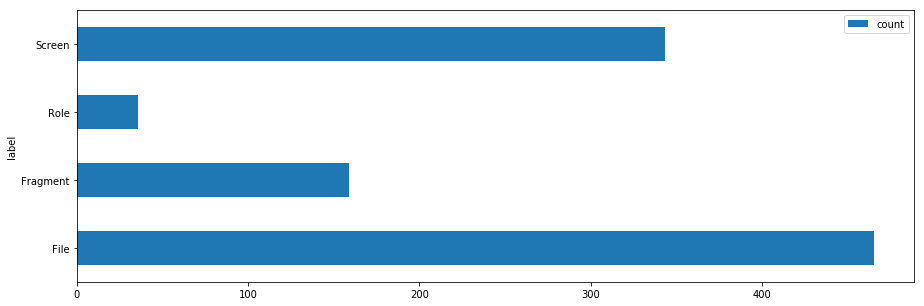

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Set default figure size.
plt.rcParams['figure.figsize'] = (15, 5)

plt.show(dfReport.plot(x='label', kind='barh',stacked=True))

#### Screens report

In [18]:
get_screens_details = """

MATCH (s:Screen)-[:AssociationRelationships]->(f:File), (s)-[:AssociationRelationships]->(r:Role)
OPTIONAL MATCH (s)-[:FlowRelationships]->(ss:Screen)
OPTIONAL MATCH (s)-[:CompositionRelationships]->(fr:Fragment)
RETURN s.group AS group, 
       s.code AS code, 
       s.alias AS title,
       f.name AS file, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT ss.code)), ', ') AS screens, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT r.name)), ', ') AS roles, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT fr.name)), ', ') AS fragments
ORDER BY s.group, s.code

"""

results = session.run(get_screens_details, parameters={})

dfScreens = DataFrame([r.values() for r in results], columns=results.keys())
dfScreens.head(5)

,group,code,title,file,screens,roles,fragments
0,ADM,Screen_407,Fragment_1402,Screen_407.jsp,,Role_1259,
1,ADM,Screen_408,Fragment_1402,Screen_408.jsp,,Role_1272,
2,ADM,Screen_409,Title of Screen_409,Screen_409.jsp,,Role_1262,
3,ADM,Screen_410,Title of Screen_410,Screen_410.jsp,,Role_1262,
4,ADM,Screen_411,Title of Screen_410,Screen_411.jsp,,Role_1262,


# Reference